# Importing All the Required Packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#  Load Dataset

In [38]:
df = pd.read_excel('Assignment_Data.xlsx')

In [39]:
df

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54
...,...,...,...,...,...,...,...,...,...,...,...
195,CUST0196,Male,32,61,113.54,9607.02,Credit Card,Yes,80,39,147
196,CUST0197,Male,47,67,133.12,4380.96,PayPal,No,21,46,62
197,CUST0198,Female,61,9,96.09,1599.30,Credit Card,No,56,23,154
198,CUST0199,Male,24,45,142.44,3527.95,PayPal,Yes,69,15,118


# Step 1. Exploratory Data Analysis (EDA)

In [40]:
# Check for missing values
missing_values = df.isnull().sum()

In [41]:
# Handle missing values (if any)
df = df.dropna()

In [42]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [43]:
df = df.dropna(subset=['TotalCharges'])

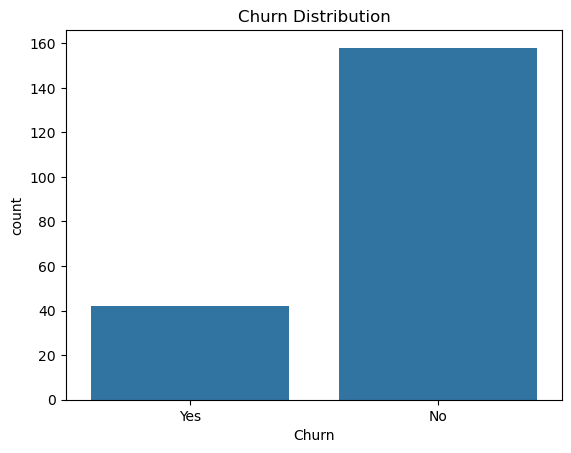

In [44]:
# Perform Univariate Analysis
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

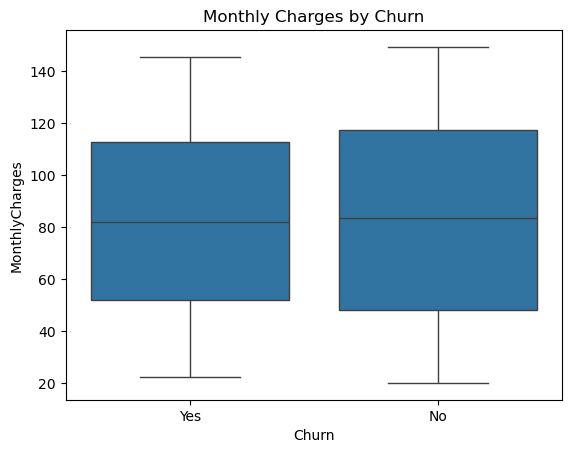

In [45]:
# Perform Bivariate Analysis
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# Step 2. Feature Engineering

In [46]:
df['AverageSpendPerMonth'] = df['TotalCharges'] / df['Tenure']

##  Using Label Encoder converting categorical variables into numeric

In [47]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

## using StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
num_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'AverageSpendPerMonth']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 3. Predictive Modeling

In [50]:
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

## Traing the Model

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Usage Of SuperVised Machine Learning Algorithms

In [52]:
models = {'Logistic Regression': LogisticRegression(),'Decision Tree': DecisionTreeClassifier(),'Random Forest': RandomForestClassifier()}
results = {}

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

In [55]:
  print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.00      0.00      0.00         9

    accuracy                           0.75        40
   macro avg       0.38      0.48      0.43        40
weighted avg       0.60      0.75      0.66        40



# # Best model (Random Forest, as an example)

In [57]:
best_model = models['Random Forest']

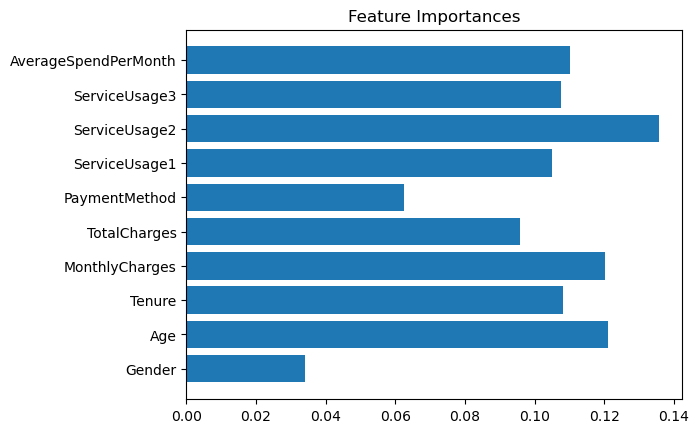

In [58]:
# Feature Importance
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importances')
plt.show()

# Step 4: Recommendation Engine

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
# Assuming 'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3' are usage features
usage_data = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']]
similarity = cosine_similarity(usage_data)

In [61]:
recommendations = np.argsort(similarity, axis=1)[:, -2:-1]
print("Recommendation Engine Output (Sample):", recommendations[:5])

Recommendation Engine Output (Sample): [[ 15]
 [ 69]
 [ 90]
 [149]
 [ 95]]
